<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Statistics

## Normality Tests

### Benchmark Case

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [4]:
paths = gen_paths(S0, r, sigma, T, M, I)

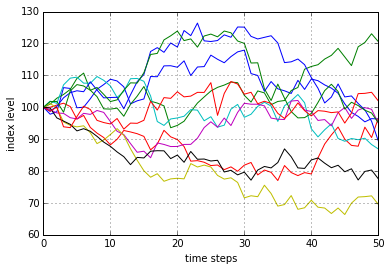

In [5]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')
# tag: normal_sim_1
# title: 10 simulated paths of geometric Brownian motion

In [6]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

In [7]:
paths[:, 0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [8]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [9]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print "%14s %15s" % ('statistic', 'value')
    print 30 * "-"
    print "%14s %15.5f" % ('size', sta[0])
    print "%14s %15.5f" % ('min', sta[1][0])
    print "%14s %15.5f" % ('max', sta[1][1])
    print "%14s %15.5f" % ('mean', sta[2])
    print "%14s %15.5f" % ('std', np.sqrt(sta[3]))
    print "%14s %15.5f" % ('skew', sta[4])
    print "%14s %15.5f" % ('kurtosis', sta[5])

In [10]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


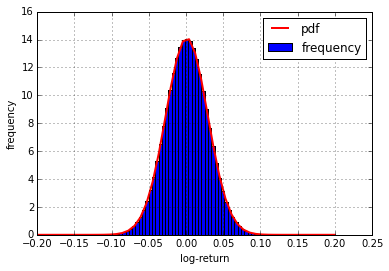

In [11]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_2
# title: Histogram of log-returns and normal density function

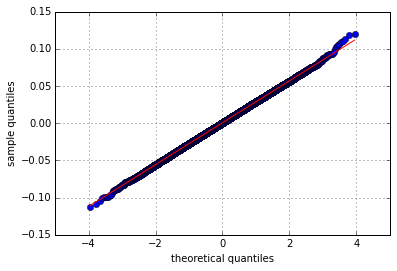

In [12]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_1
# title: Quantile-quantile plot for log returns

In [13]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print "Skew of data set  %14.3f" % scs.skew(arr)
    print "Skew test p-value %14.3f" % scs.skewtest(arr)[1]
    print "Kurt of data set  %14.3f" % scs.kurtosis(arr)
    print "Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1]
    print "Norm test p-value %14.3f" % scs.normaltest(arr)[1]

In [14]:
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


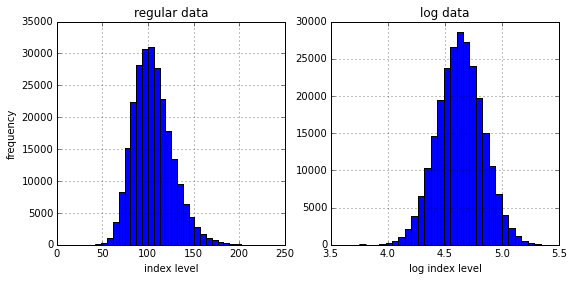

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
# tag: normal_sim_3
# title: Histogram of simulated end-of-period index levels
# size: 90

In [16]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [17]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [18]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


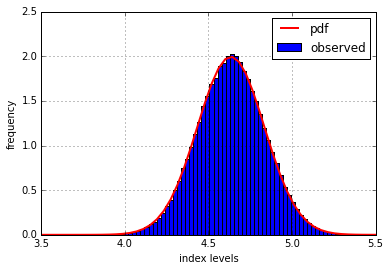

In [19]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_4
# title: Histogram of log index levels and normal density function

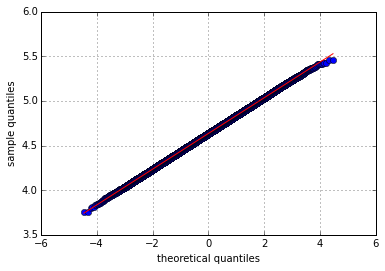

In [20]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_2
# title: Quantile-quantile plot for log index levels

### Real World Data

In [21]:
import pandas as pd
import pandas.io.data as web

In [22]:
symbols = ['2317.TW', '2412.TW', '2330.TW']

In [23]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',
                            start='1/1/2006')['Adj Close']
data = data.dropna()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2689 entries, 2006-01-02 to 2016-09-16
Data columns (total 3 columns):
2317.TW    2689 non-null float64
2412.TW    2689 non-null float64
2330.TW    2689 non-null float64
dtypes: float64(3)
memory usage: 84.0 KB


In [25]:
data.head()

,2317.TW,2412.TW,2330.TW
Date,,,
2006-01-02,46.32724,18.0684,41.4109
2006-01-03,47.47586,18.1642,42.7008
2006-01-04,50.02833,18.3238,43.0402
2006-01-05,51.81504,18.3557,43.4475
2006-01-06,51.04930,18.3557,44.4658


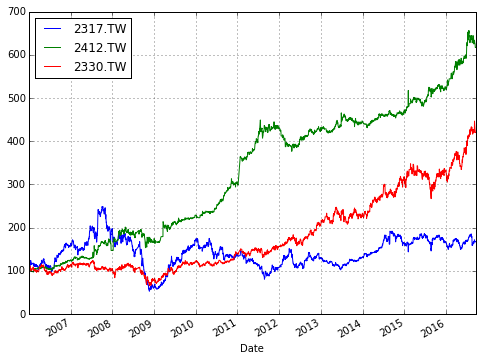

In [26]:
(data / data.ix[0] * 100).plot(figsize=(8, 6), grid=True)
# tag: real_returns_1
# title: Evolution of stock and index levels over time

In [27]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,2317.TW,2412.TW,2330.TW
Date,,,
2006-01-02,NaN,NaN,NaN
2006-01-03,0.024491,0.005288,0.030674
2006-01-04,0.052368,0.008748,0.007917
2006-01-05,0.035091,0.001739,0.009419
2006-01-06,-0.014889,0.000000,0.023167


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1196acb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119b89e90>]], dtype=object)

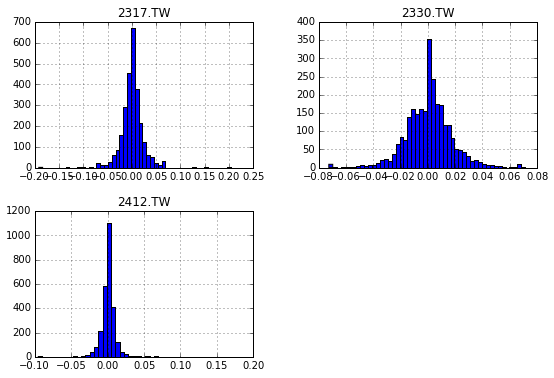

In [28]:
log_returns.hist(bins=50, figsize=(9, 6))
# tag: real_returns_2
# title: Histogram of respective log-returns
# size: 90

In [29]:
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 30 * "-"
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol 2317.TW
------------------------------
     statistic           value
------------------------------
          size      2688.00000
           min        -0.19182
           max         0.20368
          mean         0.00019
           std         0.02175
          skew         0.05460
      kurtosis         8.27574

Results for symbol 2412.TW
------------------------------
     statistic           value
------------------------------
          size      2688.00000
           min        -0.09531
           max         0.19905
          mean         0.00068
           std         0.01182
          skew         4.19166
      kurtosis        65.99565

Results for symbol 2330.TW
------------------------------
     statistic           value
------------------------------
          size      2688.00000
           min        -0.07257
           max         0.07131
          mean         0.00053
           std         0.01720
          skew         0.01875
      kurtosis   

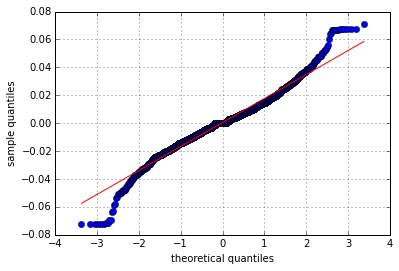

In [30]:
sm.qqplot(log_returns['2330.TW'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_1
# title: Quantile-quantile plot for S&P 500 log returns

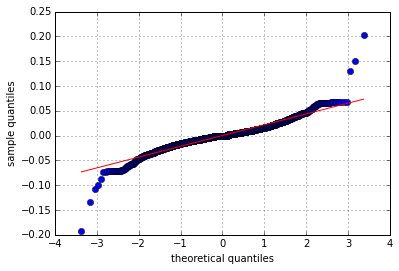

In [31]:
sm.qqplot(log_returns['2317.TW'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_2
# title: Quantile-quantile plot for Microsoft log returns

In [32]:
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 32 * "-"
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol 2317.TW
--------------------------------
Skew of data set           0.055
Skew test p-value          0.247
Kurt of data set           8.276
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol 2412.TW
--------------------------------
Skew of data set           4.192
Skew test p-value          0.000
Kurt of data set          65.996
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol 2330.TW
--------------------------------
Skew of data set           0.019
Skew test p-value          0.691
Kurt of data set           2.298
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization

### The Data

In [33]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
symbols = ['2317.TW', '2412.TW', '2330.TW', '2311.TW']
noa = len(symbols)

In [35]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',
                               end='2014-09-12')['Adj Close']
data.columns = symbols

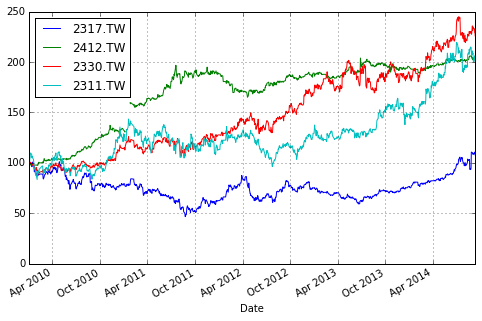

In [36]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)
# tag: portfolio_1
# title: Stock prices over time
# size: 90

In [37]:
rets = np.log(data / data.shift(1))

In [38]:
rets.mean() * 252

2317.TW    0.015533
2412.TW    0.107857
2330.TW    0.170895
2311.TW    0.148230
dtype: float64

In [39]:
rets.cov() * 252

,2317.TW,2412.TW,2330.TW,2311.TW
2317.TW,0.082661,0.005752,0.024203,0.036506
2412.TW,0.005752,0.011418,0.007447,0.006697
2330.TW,0.024203,0.007447,0.048111,0.031379
2311.TW,0.036506,0.006697,0.031379,0.093624


### The Basic Theory

In [40]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [41]:
weights

array([ 0.07650728,  0.06021919,  0.63364218,  0.22963135])

In [42]:
np.sum(rets.mean() * weights) * 252
  # expected portfolio return

0.15000779072374698

In [43]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
  # expected portfolio variance

0.038346228248957774

In [44]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
  # expected portfolio standard deviation/volatility

0.19582192994901715

In [45]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

<matplotlib.colorbar.Colorbar instance at 0x11ab2cab8>

/Users/seanchen/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


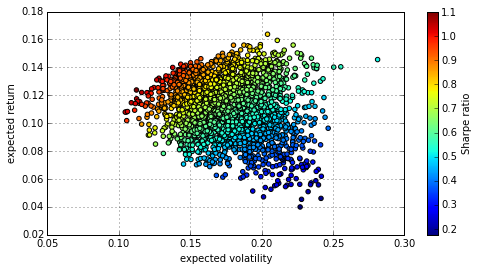

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_2
# title: Expected return and volatility for different/random portfolio weights
# size: 90

### Portfolio Optimizations

In [47]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [48]:
import scipy.optimize as sco

In [49]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [50]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [51]:
bnds = tuple((0, 1) for x in range(noa))

In [52]:
noa * [1. / noa,]

[0.25, 0.25, 0.25, 0.25]

In [53]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

CPU times: user 41.6 ms, sys: 2.42 ms, total: 44 ms
Wall time: 42.3 ms


In [54]:
opts

     fun: -1.1222007616170728
     jac: array([  8.51160899e-01,  -3.00228596e-04,   8.68663192e-04,
         1.65729225e-03,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  9.66549208e-17,   7.63180098e-01,   2.07118409e-01,
         2.97014929e-02])

In [55]:
opts['x'].round(3)

array([ 0.   ,  0.763,  0.207,  0.03 ])

In [56]:
statistics(opts['x']).round(3)

array([ 0.122,  0.109,  1.122])

In [57]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [58]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [59]:
optv

     fun: 0.010858119739568607
     jac: array([ 0.02194637,  0.02169837,  0.02169031,  0.02211134,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 67
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([ 0.04714257,  0.88159125,  0.05494524,  0.01632095])

In [60]:
optv['x'].round(3)

array([ 0.047,  0.882,  0.055,  0.016])

In [61]:
statistics(optv['x']).round(3)

array([ 0.108,  0.104,  1.033])

### Efficient Frontier

In [62]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [63]:
def min_func_port(weights):
    return statistics(weights)[1]

In [64]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 6.01 s, sys: 52 ms, total: 6.07 s
Wall time: 6.14 s


<matplotlib.colorbar.Colorbar instance at 0x1174c27a0>

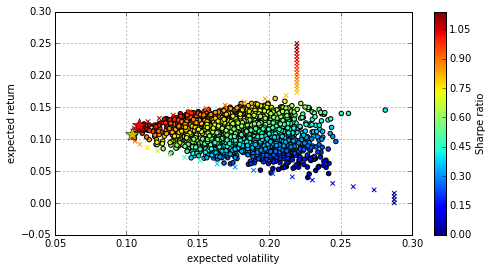

In [65]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_3
# title: Minimum risk portfolios for given return level (crosses)
# size: 90

### Capital Market Line

In [66]:
import scipy.interpolate as sci

In [67]:
ind = np.argmin(tvols)
evols = tvols[ind:][:10]
erets = trets[ind:][:10]


In [68]:
evols

array([ 0.1042064 ,  0.1045105 ,  0.10568763,  0.10912104,  0.11502082,
        0.12303233,  0.13277386,  0.14389459,  0.15609985,  0.16915511])

In [69]:
erets

array([ 0.10714286,  0.1122449 ,  0.11734694,  0.12244898,  0.12755102,
        0.13265306,  0.1377551 ,  0.14285714,  0.14795918,  0.15306122])

In [70]:
tck = sci.splrep(evols,erets,per=True)
#tck = sci.splrep(erets,evols,per=True)

In [71]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [72]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [73]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [74]:
opt

array([ 0.01      ,  0.99696716,  0.15089816])

In [75]:
np.round(equations(opt), 6)

array([ 0., -0., -0.])

<matplotlib.colorbar.Colorbar instance at 0x11b4dedd0>

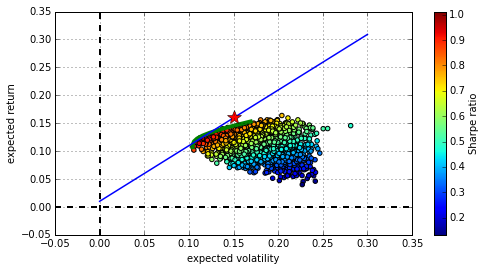

In [76]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_4
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
# size: 90

In [77]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [78]:
res['x'].round(3)

array([ 0.   ,  0.155,  0.815,  0.03 ])

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>